# Early Detection of Chronic Kidney Disease Using Machine Learning Techniques

## Exploratory Data Analysis (EDA)

In [214]:
# importing all the necessary libraries and classes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [215]:
# loading ckd cleaned dataset

df= pd.read_csv('kidney_disease_dataset_cleaned.csv')
df.head(10)


,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCells,pusCellClumps,bacteria,bloodGlucoseRandom,bloodUrea,serumCreatinine,sodium,potassium,haemoglobin,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


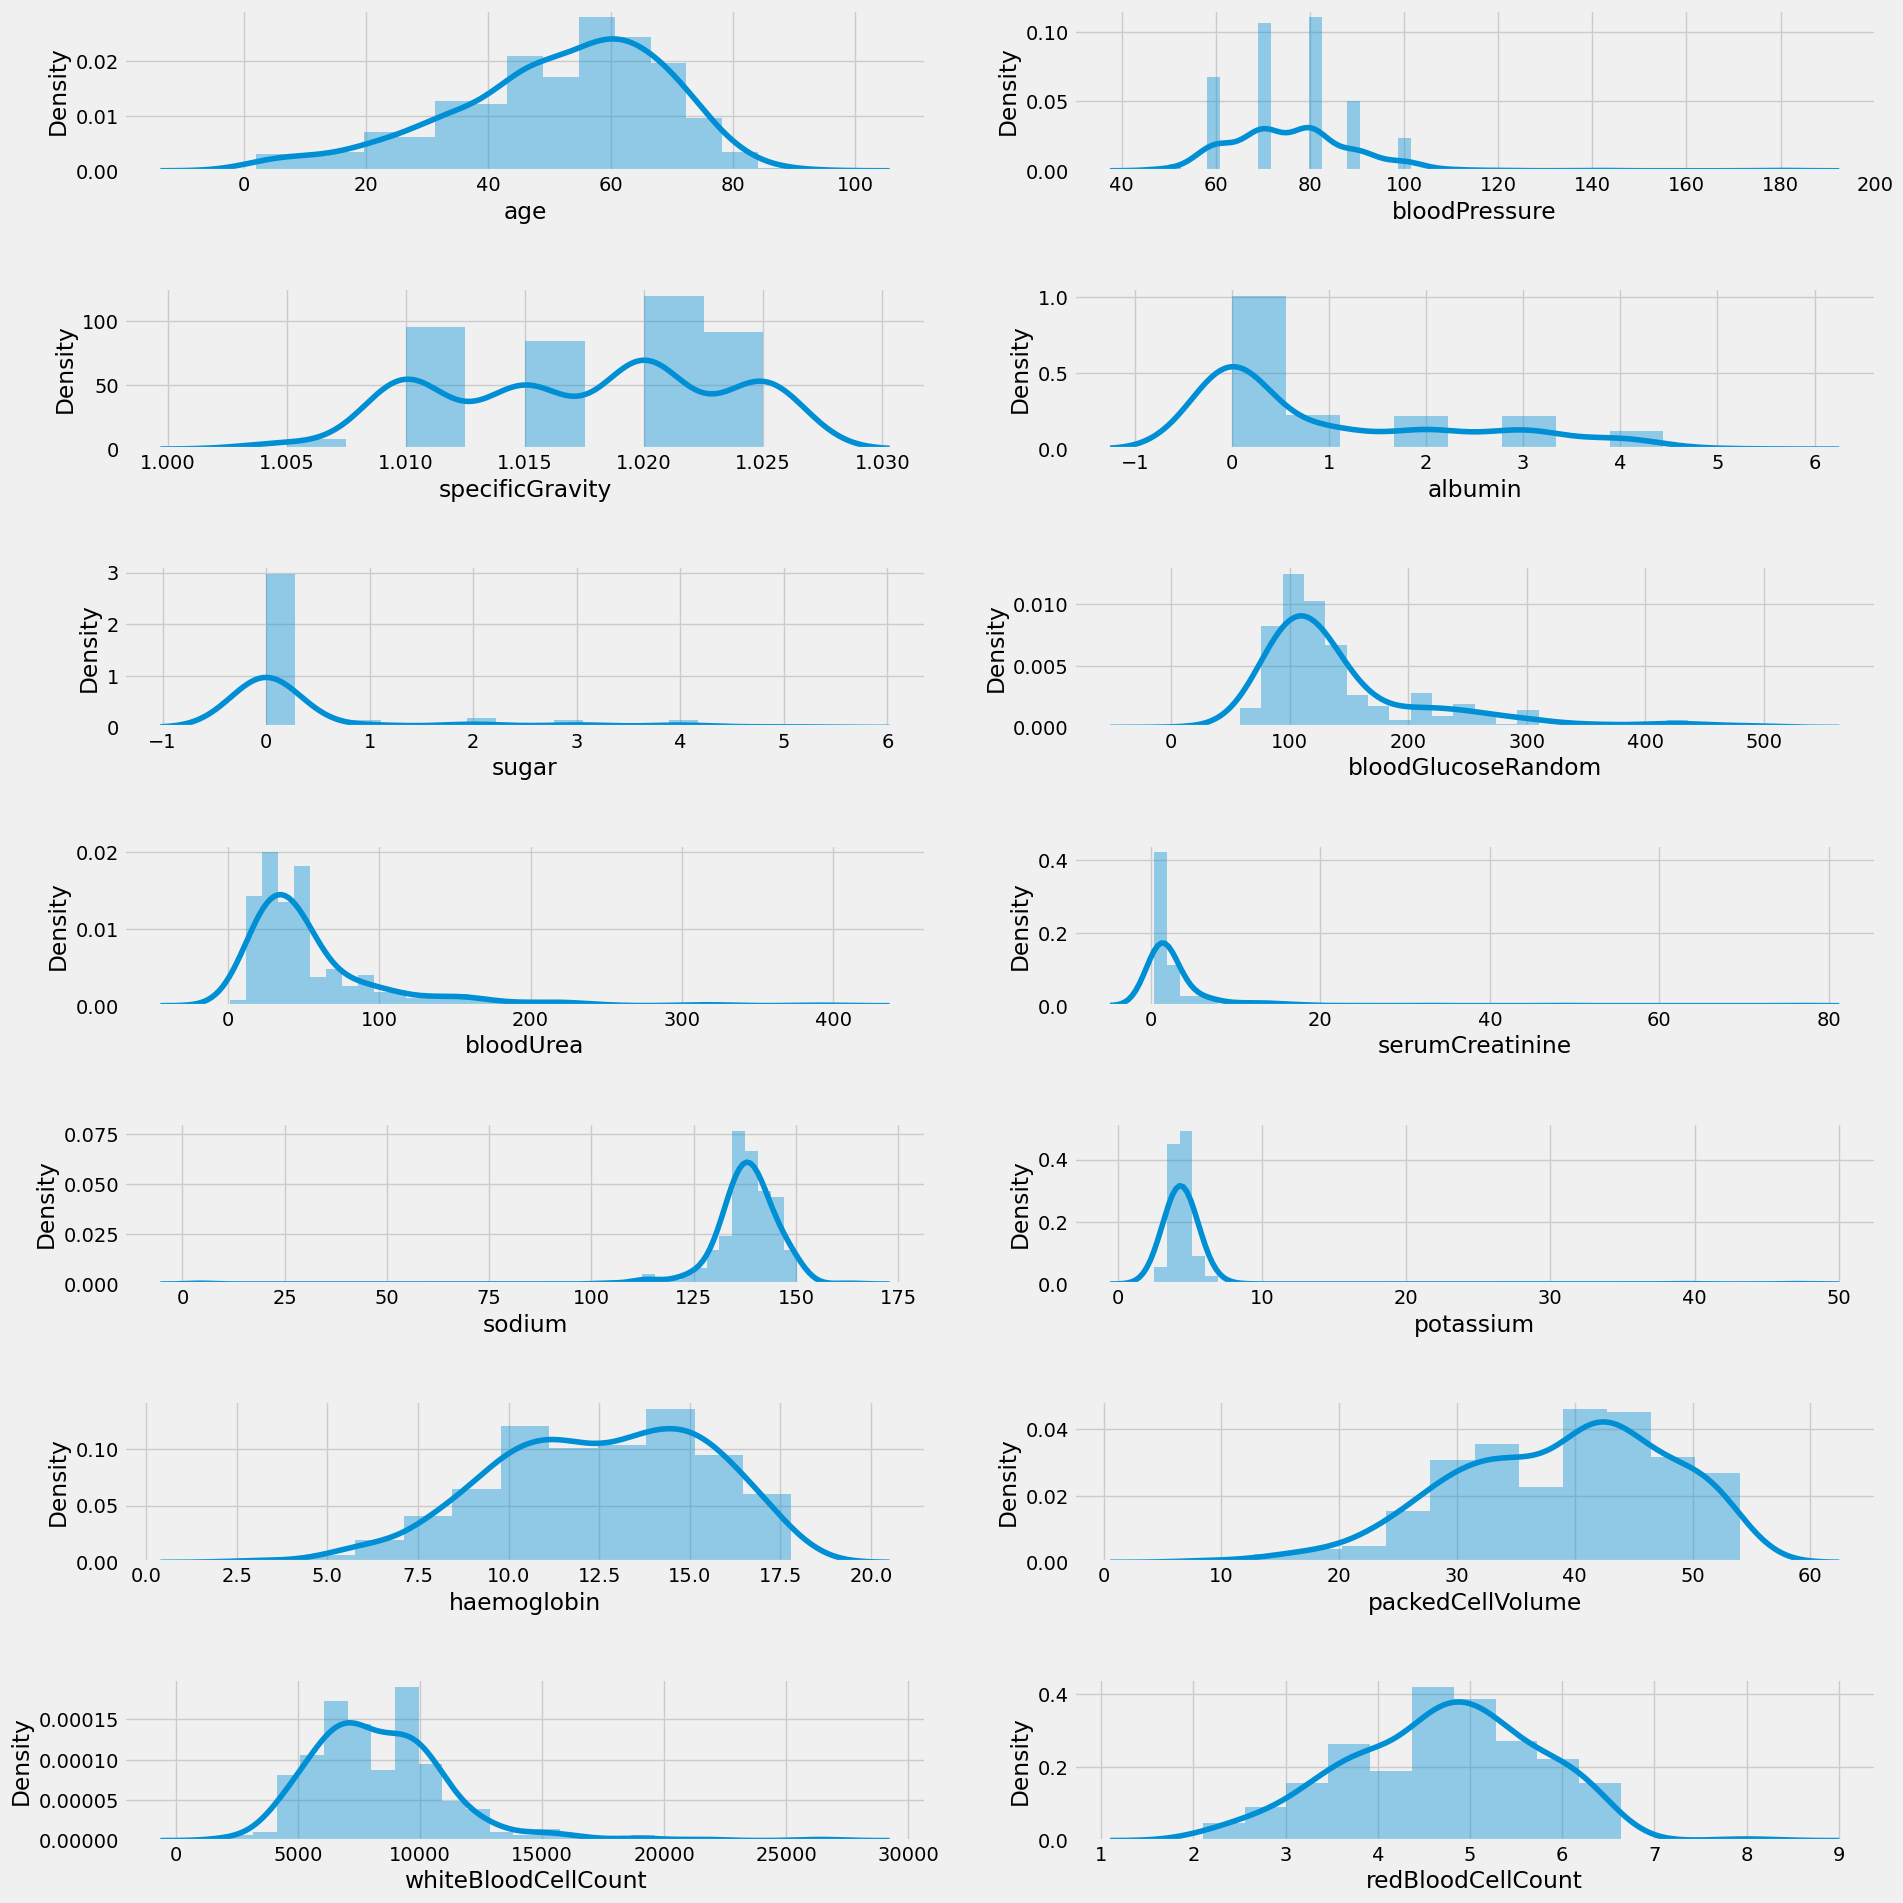

In [216]:
#numerical feature distribution
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

plt.style.use('fivethirtyeight')

plt.figure(figsize = (20, 20))
plotCount = 1

for col in numerical_cols:
    if plotCount <= len(numerical_cols):
        ax = plt.subplot(7, 2,plotCount)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotCount+=1

    
plt.tight_layout(pad = 3)
plt.show()

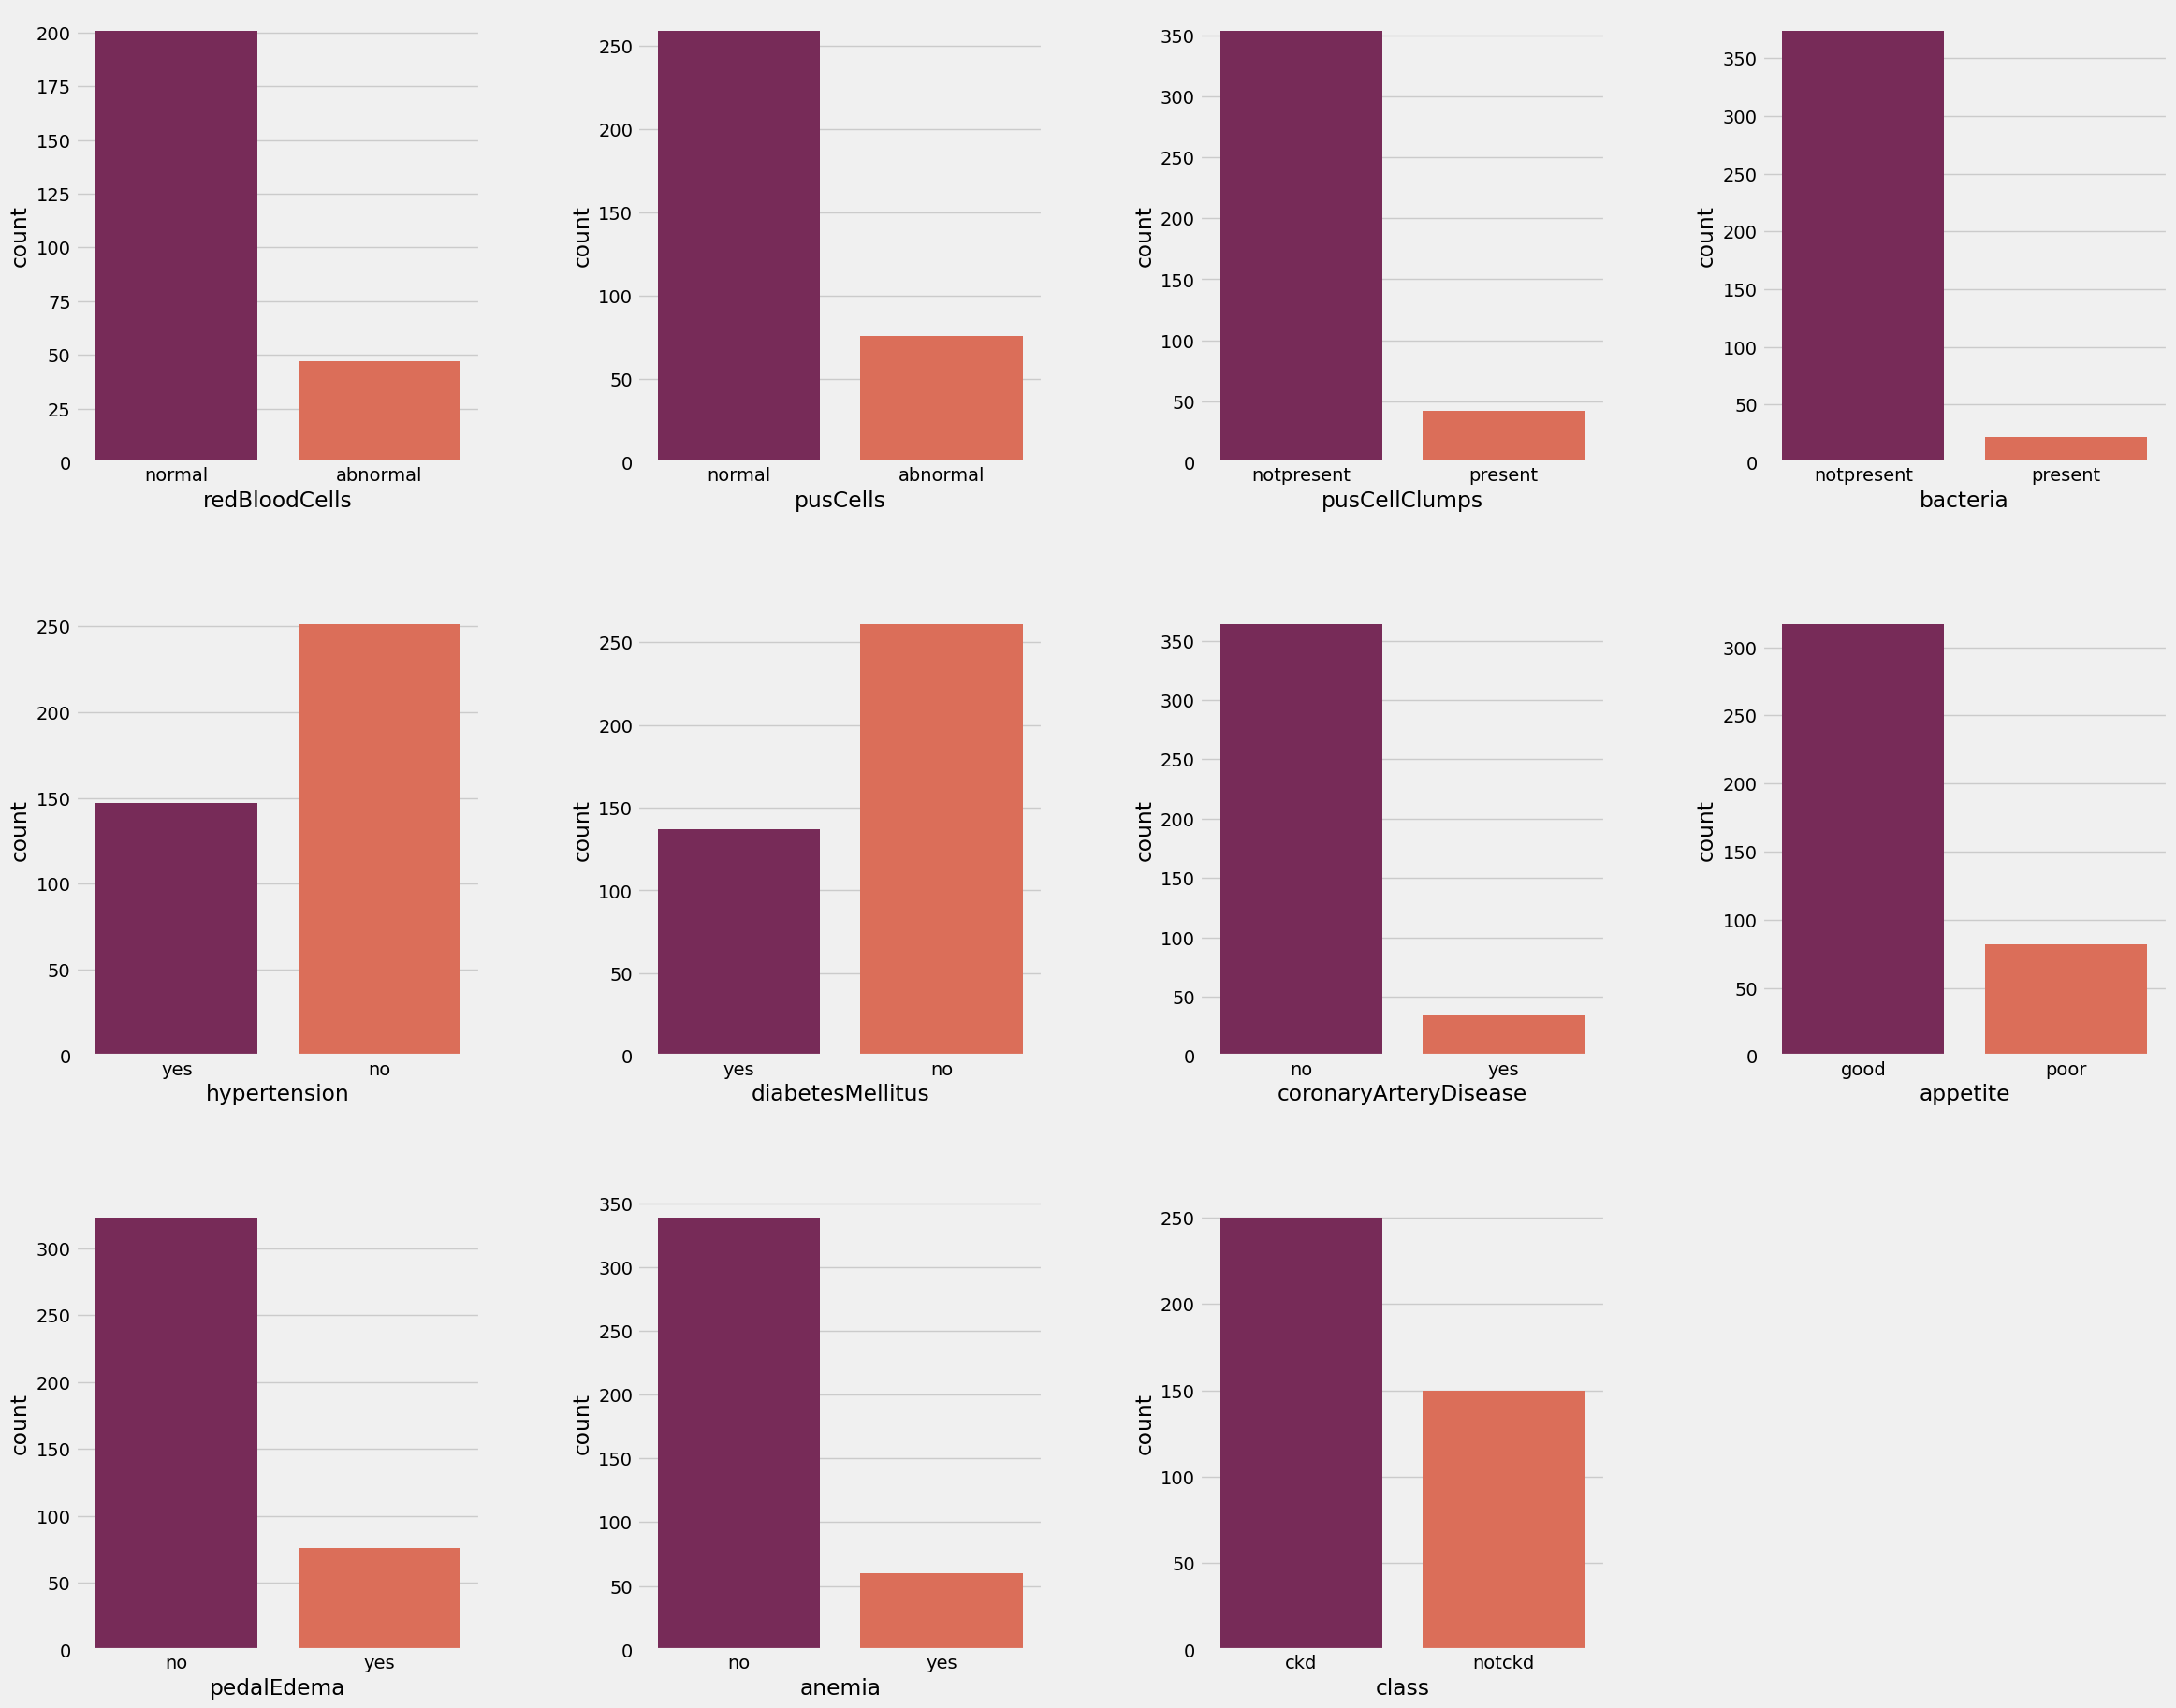

In [217]:
 #categorical columns label distribution
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

plt.figure(figsize = (25, 20))
plotCount = 1

for col in categorical_cols:
    if plotCount <= len(categorical_cols):
        ax = plt.subplot(3, 4, plotCount)
        sns.countplot(data=df, x=col, palette = 'rocket')
        plt.xlabel(col)

    plotCount += 1

plt.tight_layout(pad = 5)
plt.show()

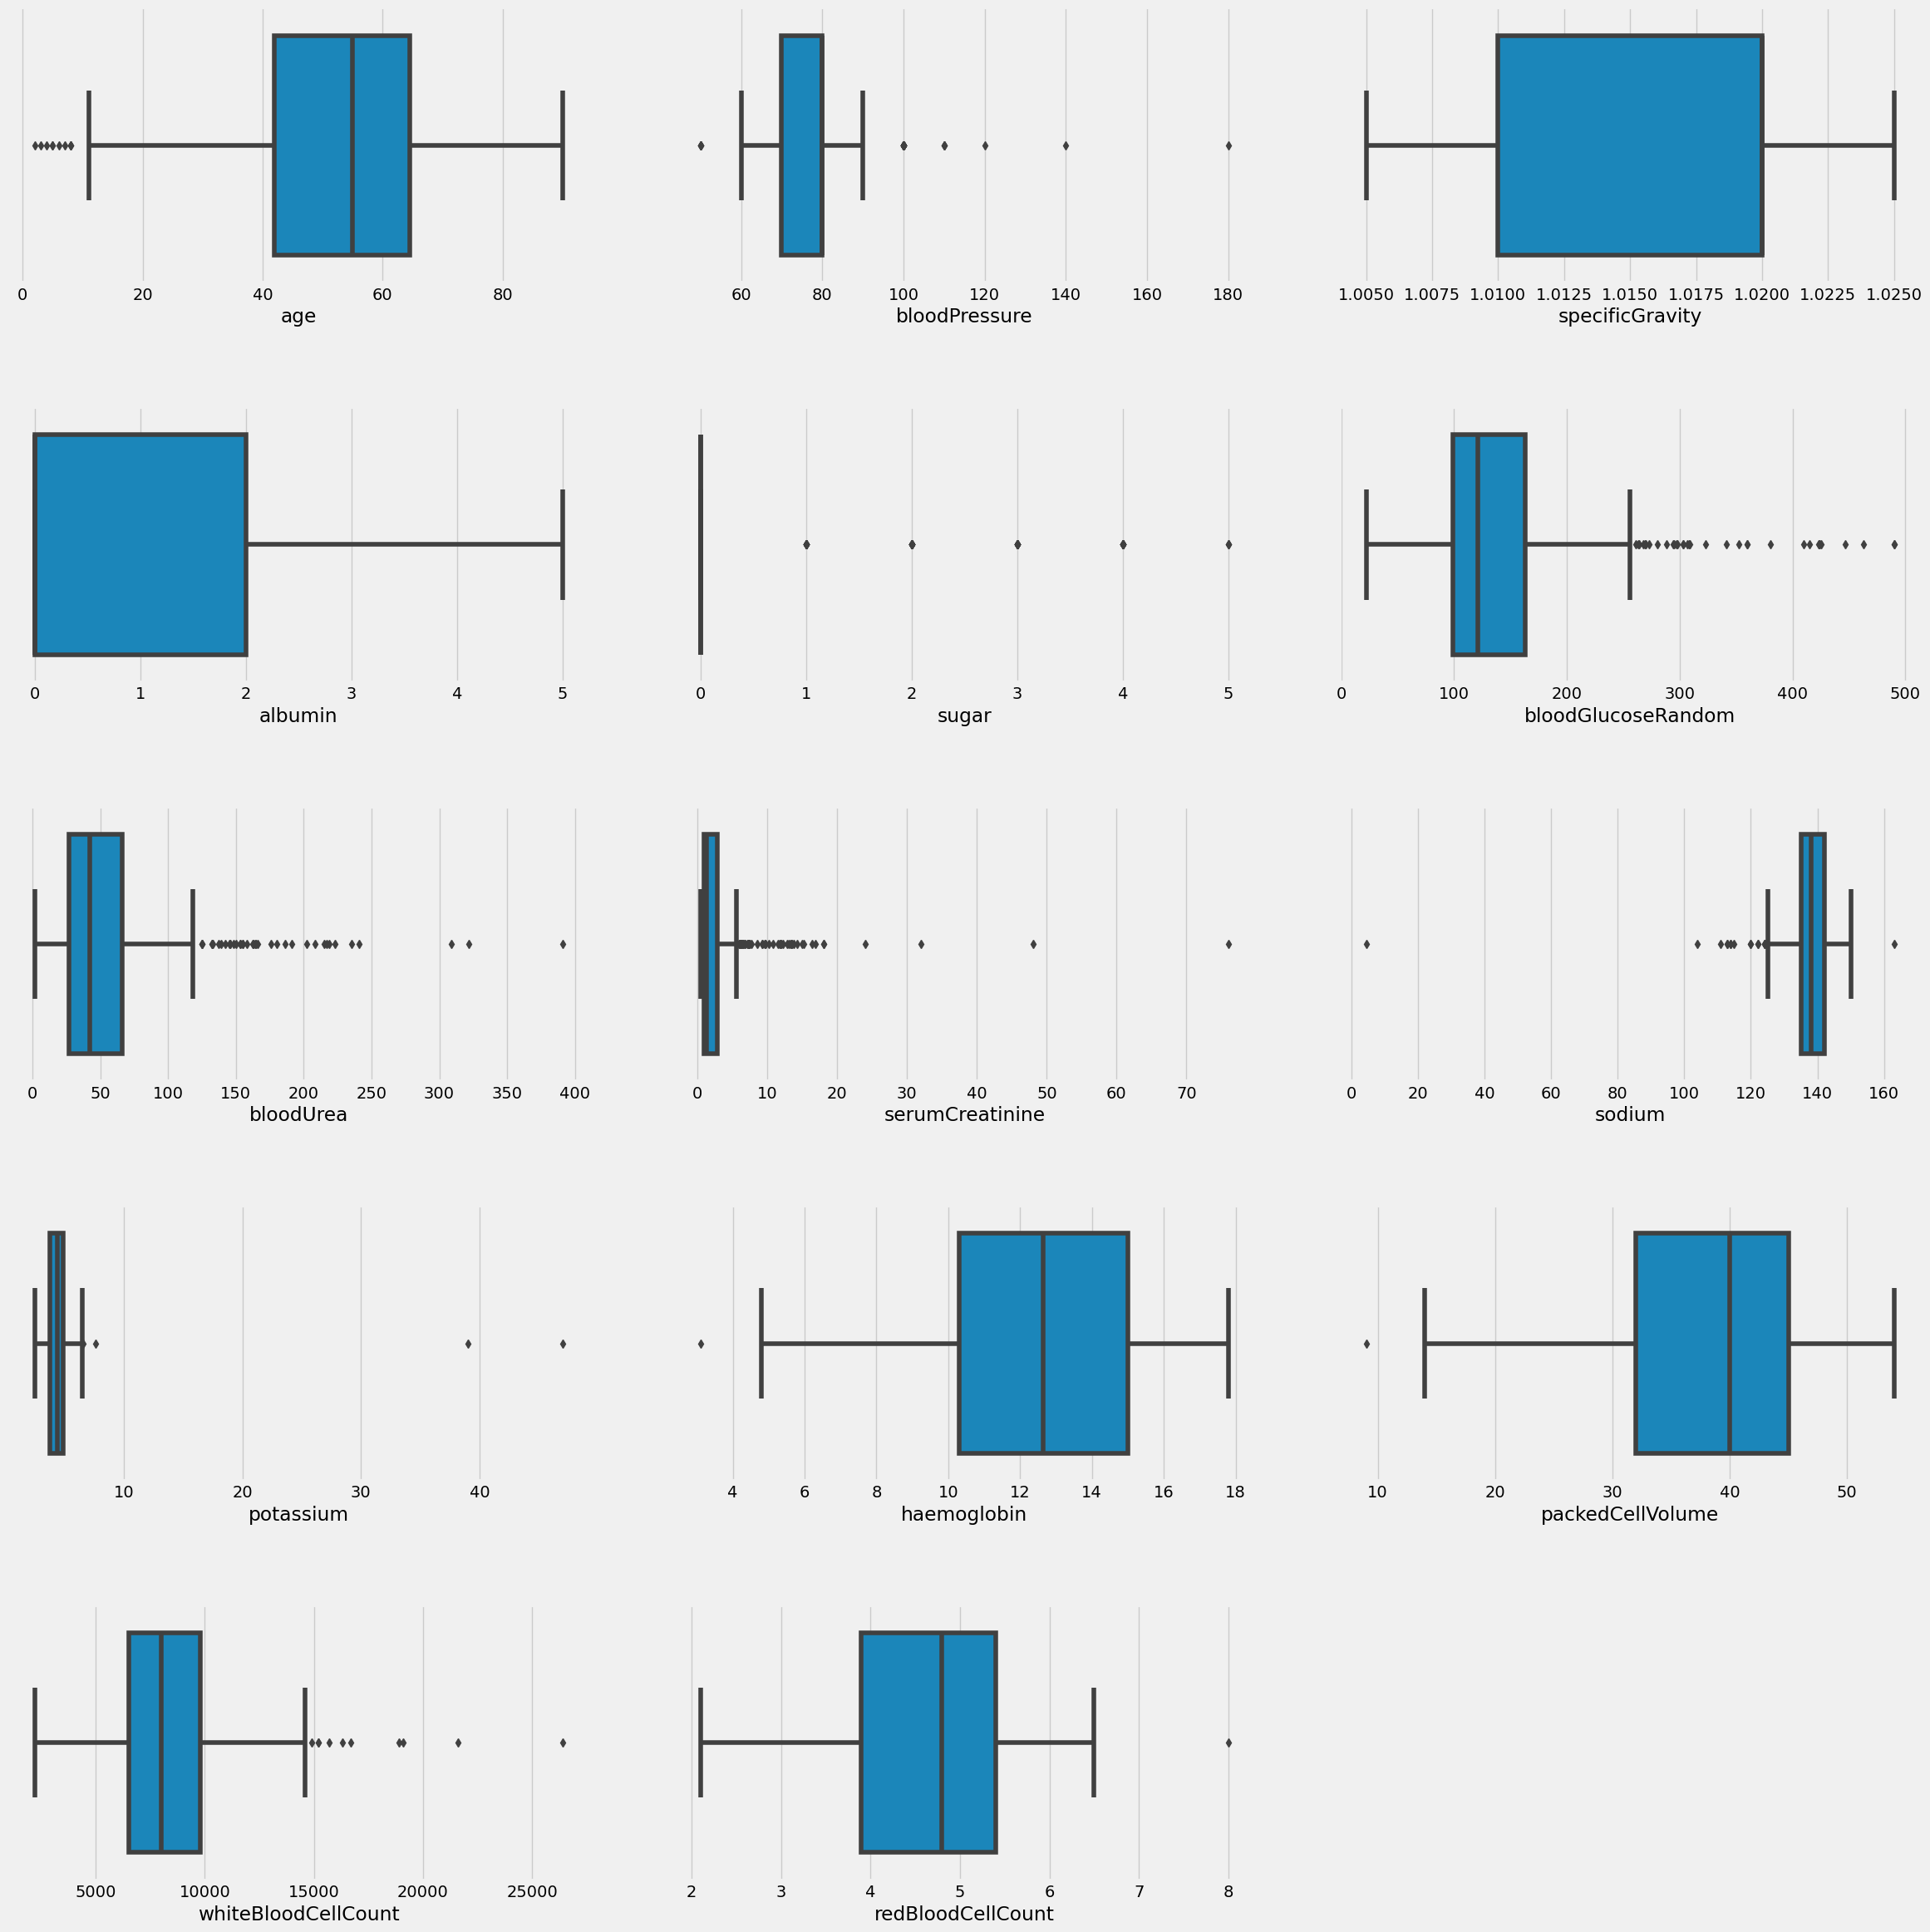

In [218]:
#finding outliers for numerical columns
plt.figure(figsize = (25, 25))
plotCount = 1

for col in numerical_cols:
    if plotCount <= len(numerical_cols):
        ax = plt.subplot(5, 3,plotCount)
        sns.boxplot(df[col])
        plt.xlabel(col)
    plotCount+=1

    
plt.tight_layout(pad = 5)
plt.show()

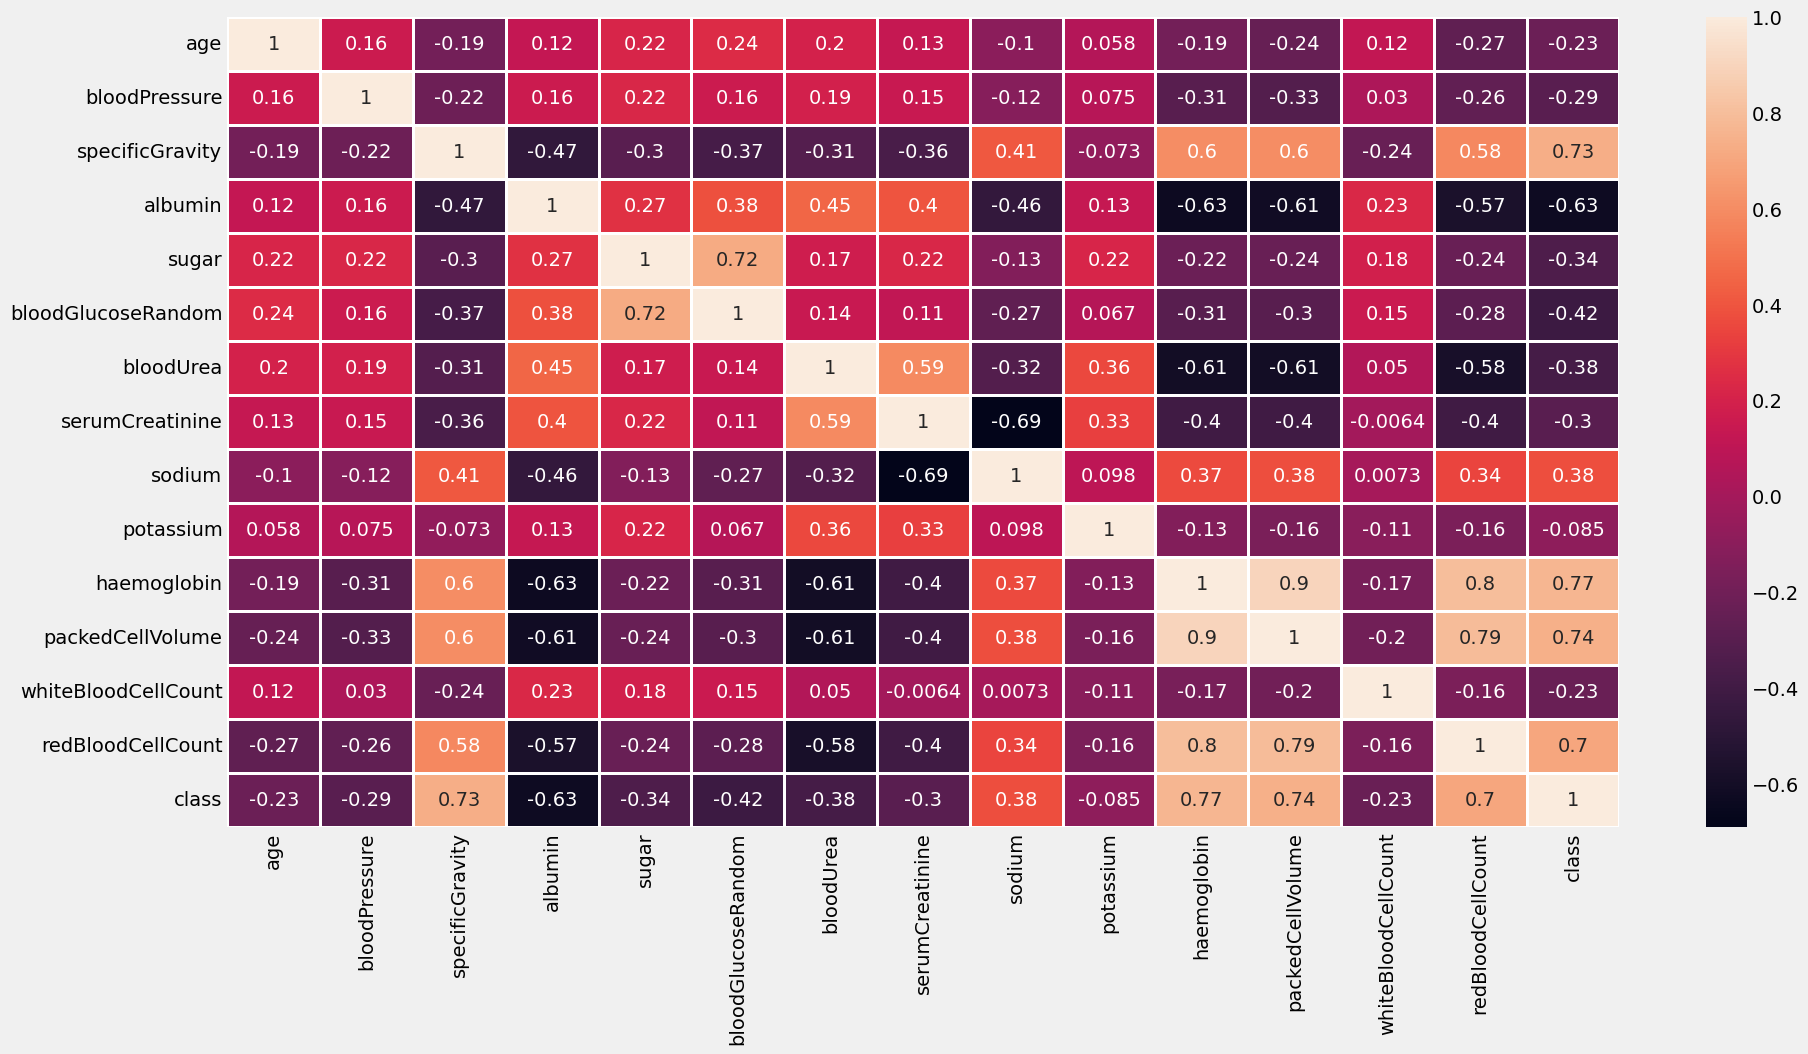

In [219]:
# finding correaltions from heatmap of data before data preprocessing

corr_df = df.copy()
corr_df['class'] = corr_df['class'].map({'ckd': 0, 'notckd': 1})
corr_df['class'] = pd.to_numeric(corr_df['class'], errors='coerce')

plt.figure(figsize = (20, 10))

sns.heatmap(corr_df.corr(), annot = True, linewidths = 2)
plt.show()

## Data Visualization 

In [224]:
df.columns

Index(['age', 'bloodPressure', 'specificGravity', 'albumin', 'sugar',
       'redBloodCells', 'pusCells', 'pusCellClumps', 'bacteria',
       'bloodGlucoseRandom', 'bloodUrea', 'serumCreatinine', 'sodium',
       'potassium', 'haemoglobin', 'packedCellVolume', 'whiteBloodCellCount',
       'redBloodCellCount', 'hypertension', 'diabetesMellitus',
       'coronaryArteryDisease', 'appetite', 'pedalEdema', 'anemia', 'class'],
      dtype='object')

In [223]:
# defining functions to create various data visualization plots

def violinPlot(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True)
    return fig.show()

def kdePlot(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatterPlot(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class")
    return fig.show()

In [226]:
numerical_cols

['age',
 'bloodPressure',
 'specificGravity',
 'albumin',
 'sugar',
 'bloodGlucoseRandom',
 'bloodUrea',
 'serumCreatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packedCellVolume',
 'whiteBloodCellCount',
 'redBloodCellCount']

In [232]:
violinPlot('redBloodCellCount')
    

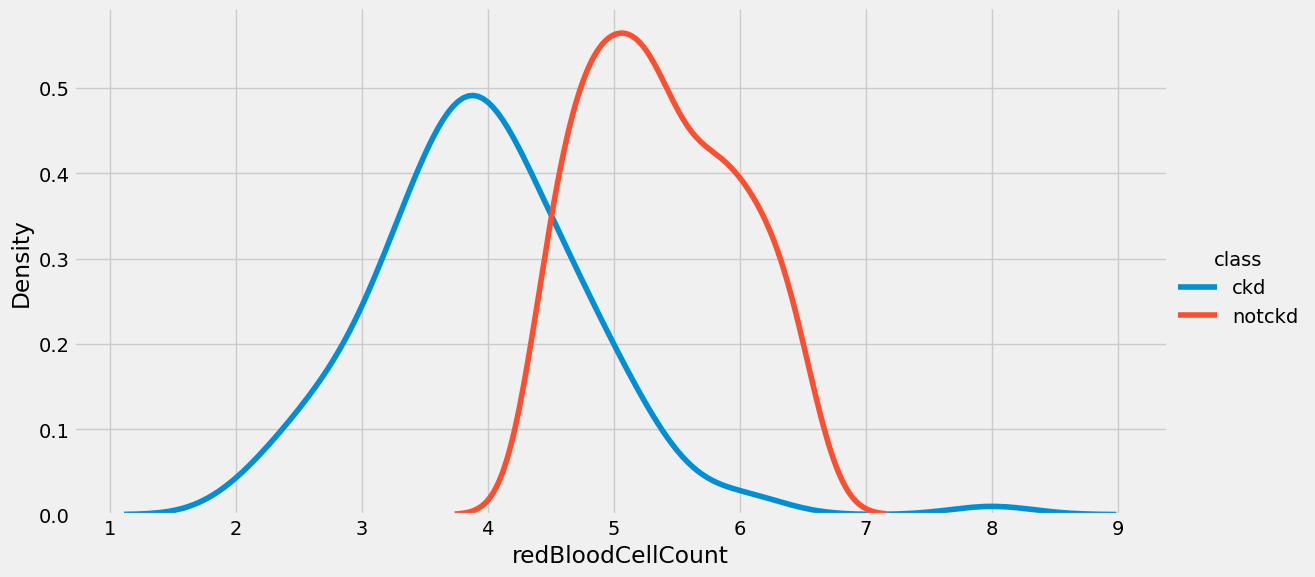

In [233]:
kdePlot('redBloodCellCount')

In [234]:
violinPlot('whiteBloodCellCount')

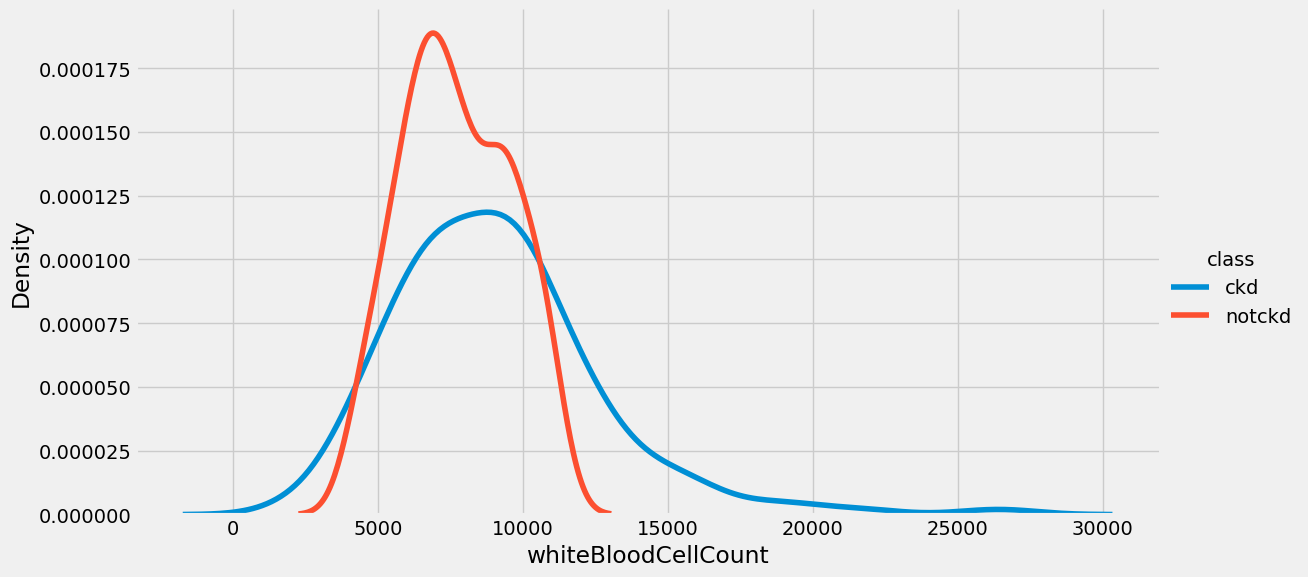

In [235]:
kdePlot('whiteBloodCellCount')

In [236]:
violinPlot('packedCellVolume')

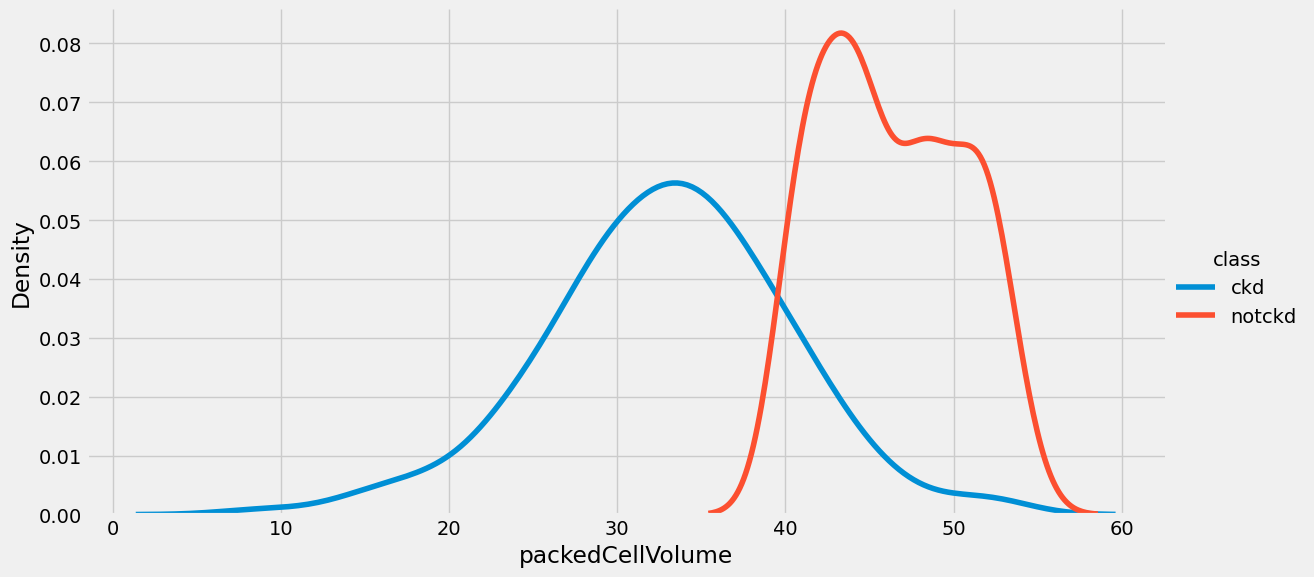

In [237]:
kdePlot('packedCellVolume')

In [238]:
violinPlot('haemoglobin')

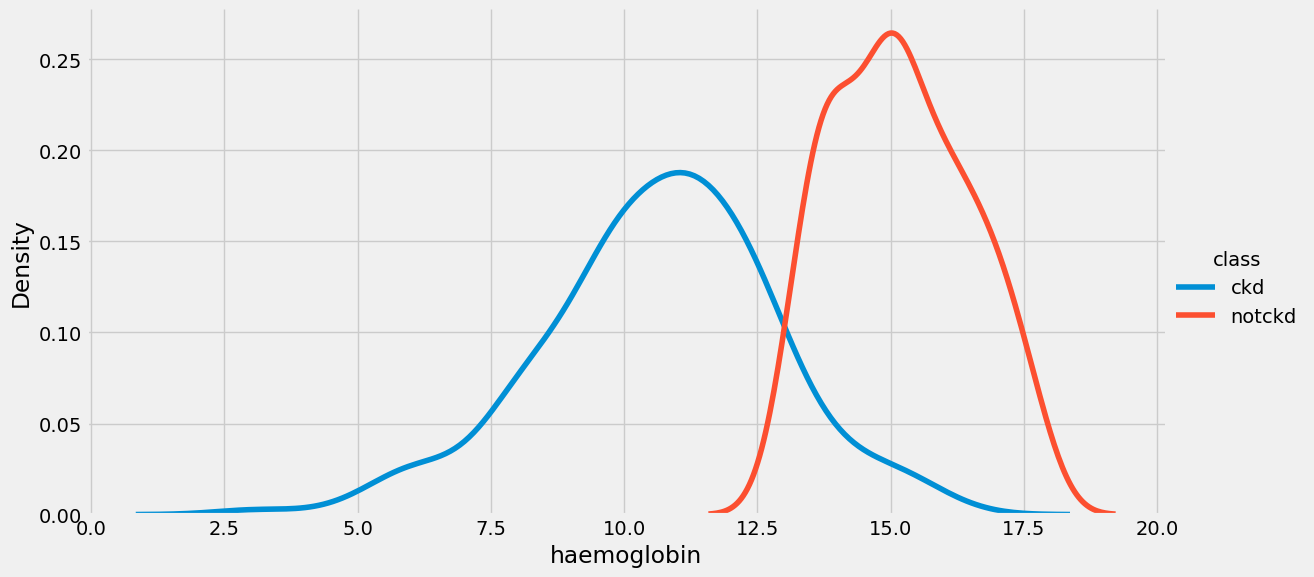

In [239]:
kdePlot('haemoglobin')

In [240]:
violinPlot('bloodGlucoseRandom')

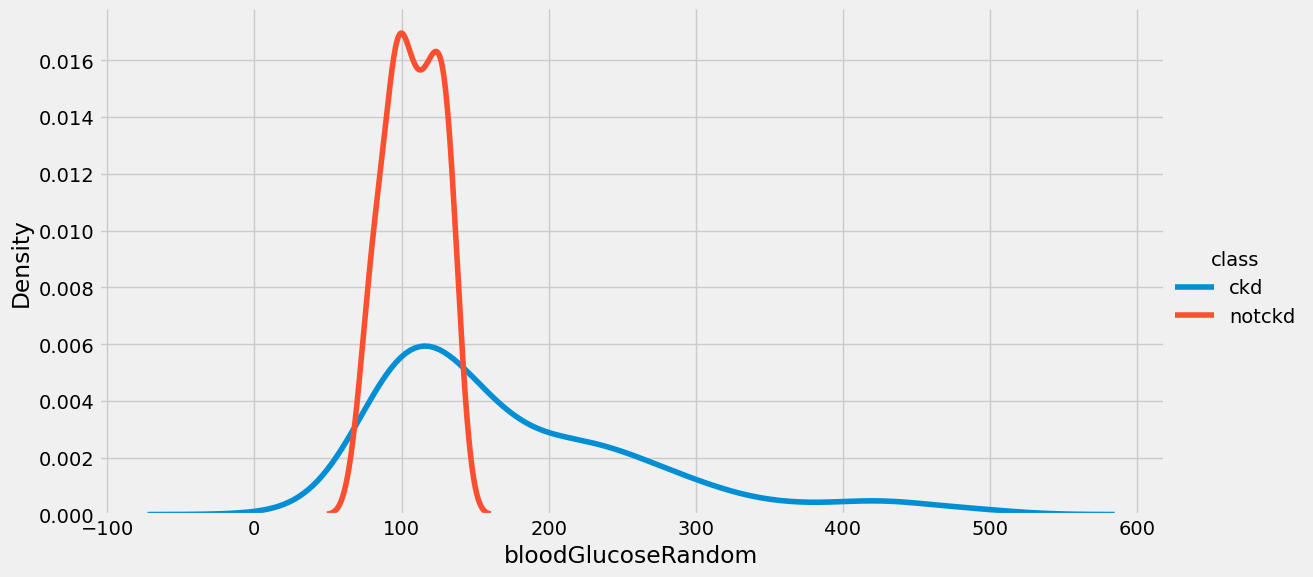

In [241]:
kdePlot('bloodGlucoseRandom')

In [242]:
violinPlot('bloodUrea')

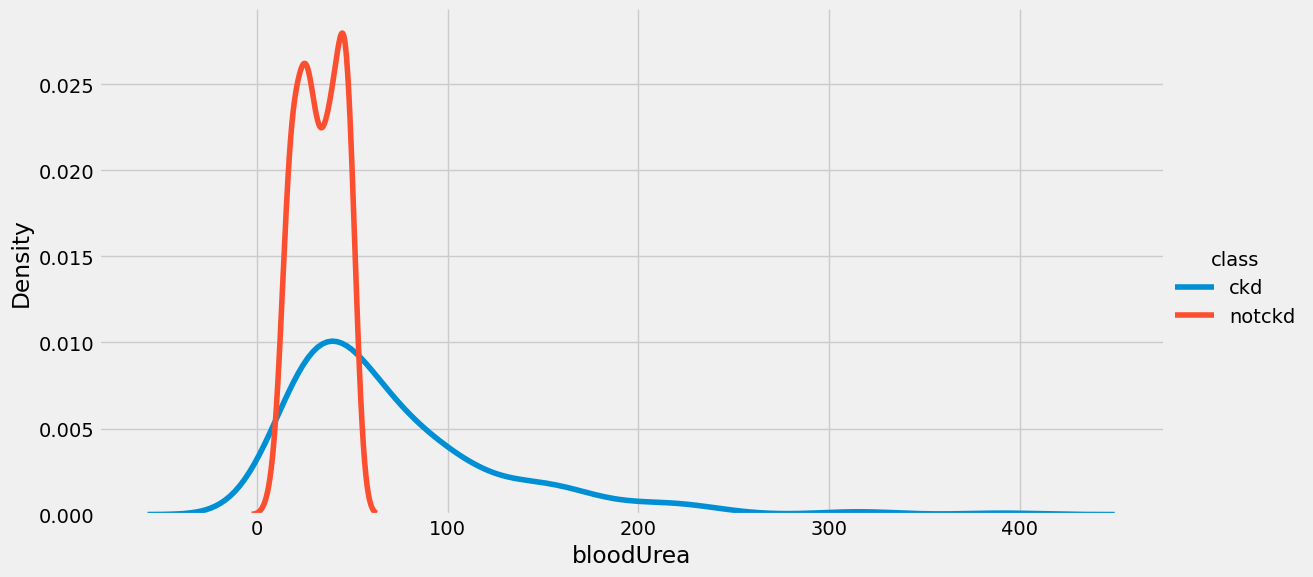

In [243]:
kdePlot('bloodUrea')

In [244]:
violinPlot('specificGravity')

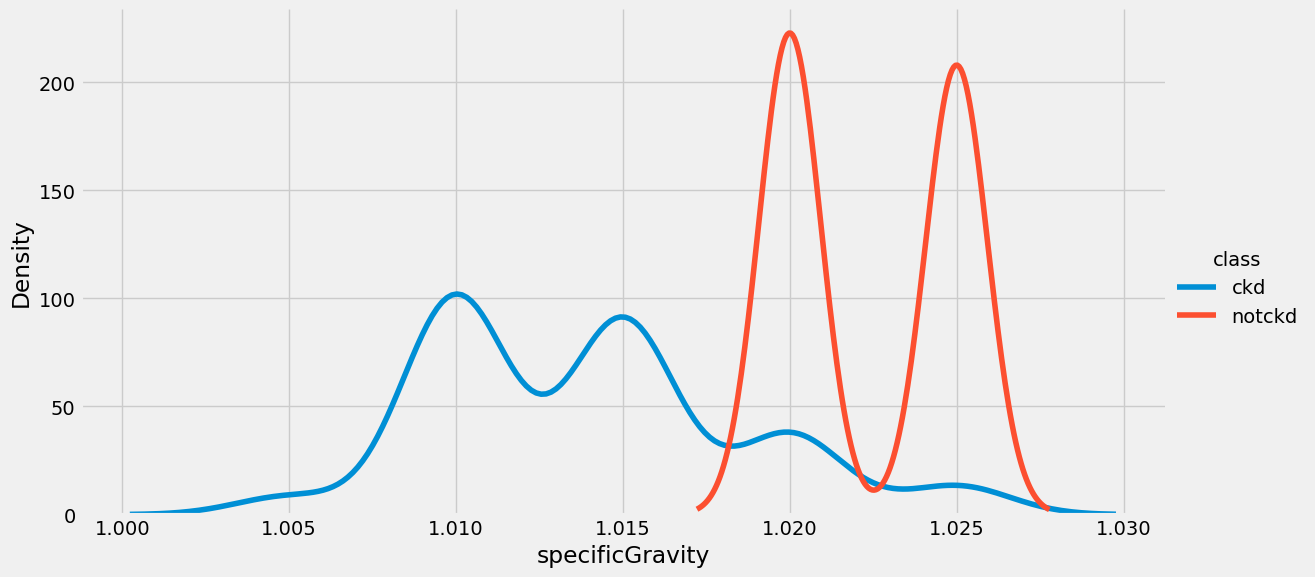

In [245]:
kdePlot('specificGravity')

In [246]:
scatterPlot('haemoglobin','packedCellVolume')

In [247]:
scatterPlot('redBloodCellCount','packedCellVolume')

In [249]:
scatterPlot('packedCellVolume','bloodUrea')